## 1 - Packages ##

First, you need to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](pandas.pydata.org/) is an important package for Python data analysis.
- [jdc](https://alexhagen.github.io/jdc/) : Jupyter magic that allows defining classes over multiple jupyter notebook cells.

In [16]:
!pip install jdc
import numpy as np
import pandas as pd
import jdc
import matplotlib.pyplot as plt

## 2 - Required Methods ##

### 2.1 - Return the index of the maximum value in an array ###
- [Numpy.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

In [2]:
# Define a DataFrame object
df_sample = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]]),
                   columns=['a', 'b', 'c'])

print(df_sample)
# print items in column "a"
print(df_sample['a'])

# print the index of the item that has the maximum value
print(np.argmax(df_sample['a']))

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  0
0    1
1    4
2    7
Name: a, dtype: int64
2


In [3]:
# Print the maximum value
idx = np.argmax(df_sample['a'])

print(df_sample['a'][idx])

7


#### Graded Excercise #### 
- Print out the index of the maximun item in column "c"
- Use the index to print its value

In [4]:
# Will be graded

# Print the column names of the training data
### START CODE HERE ### (≈ 1 line of code)
# get the index of the maximum value in column "c" in df_sample
idx_c = np.argmax(df_sample['c'])

# print the index
print(f'The index for the maximum value in column c is {idx_c}')

# get the maximum value based on idx_c for column "c" in df_sample
max_val_c = df_sample['c'][idx_c]
print("The maximun value in column c is", max_val_c)
### END CODE HERE ###

The index for the maximum value in column c is 1
The maximun value in column c is 6


## 3 - Fundamentals in Decision Tree ##

### 3.1 - Entropy ###
- As usual, we will define a class named "Decision_Tree"
- We will implement entropy function:
$$ H = -\sum_{i=1}^{n} P_{i} * \log_{2}P_{i}$$

In [5]:
class Decision_Tree():
    def __init__(self):
        # a dictionary of generated decision tree
        self.tree = None
        
    def entropy(self, column):
        """
        Calculate the entropy of a given data column.
        column: the data column
        """
        
        # the list that will contain every -pi * log(pi)
        ent_list = []
        
        ### START CODE HERE ###
        # Determine the unique values in the column and their corresponding counts of each unique value
        values, counts = np.unique(column, return_counts=True)
        
        # The number of disctint values
        num_distinct_values = len(values)
        # the total number of items in the column
        total_items_in_column = len(column)
        
        for i in range(num_distinct_values):
            # calculate the probability pi for the ith value 
            p_i = counts[i]/ total_items_in_column
            # calculate -pi * log(pi)
            ent_i =  -p_i * np.log2(p_i)
            #put the result into the list
            ent_list.append(ent_i)
        
        ### END CODE HERE ###

        return np.sum(ent_list)

### 3.2 - Information Gain ###
$$ IG(S|a) = entropy(S) - \sum_{v \in values(a)} \frac {|S_{v}|} {|S|} * entropy(S_{v})$$
where
- $IG(S|a)$ means the information gain if we split data S using attribute a
- $|S_{v}|$ means the number of items with $a = v$
- $|S|$ means the total number of items in S
- $\frac {|S_{v}|} {|S|}$ is the probability of $ a = v $

In [6]:
%%add_to Decision_Tree
def Infomation_Gain(self, S, entropy_before_splitting, a, class_name = "class"):
    """
    Calculate the information gain of a dataset. This function takes four parameters:
    1. S: the overall dataset (See the equation above)
    2. entropy_before_splitting: the entropy before splitting
    3. a: the attribute that we will use to split the data (See the equation above)
    4. class_name = the class that the set of data is classified as
    """    
    # the list that will contain the weighted entropy of each child, i.e., Pv * Hv, 
    #       where Pv is the probability of being in the child node v, and
    #       Hv is the entropy of child node v: entropy(Sv).
    H_list = []
    
    ### START CODE HERE ###
    #determine the unique values and their corresponding counts for the split attribute 
    unique_vals, counts= np.unique(S[a], return_counts=True)
    
    #calculate the total number of items in S
    total_S = len(S)
    #Calculate the total number of unnique values with regard to attribute a
    total_Sv = len(unique_vals)
    
    for i in range(total_Sv):
        # the probablity of being in the ith child node
        P_i = counts[i]/total_S
        # the value v of the ith child
        v = unique_vals[i]
        # the subset Sv, where a = v
        # hint: use DataFrame.where and only return the "class" column
        S_v = S.where(S[a] == v).dropna()[class_name]
        # the entropy of child node Sv
        H_i = self.entropy(S_v)
        # put P_i * H_i into the H_list 
        H_list.append(P_i * H_i)
    
    # calculate the conditional entropy based on H_list
    conditional_entropy = np.sum(H_list)
    ### END CODE HERE ###
    
    #Calculate the information gain
    Information_Gain = entropy_before_splitting - conditional_entropy
    return Information_Gain

### 3.3 - Determine the majority class for a given data vector ###
- If a data vector is equally split among multiple classes, we return the global_majority_class as the the class for the data vector
- Otherwise, return the majority class of the data vector

In [7]:
%%add_to Decision_Tree

#This function determines the majority class for a data_vector
def Get_Majority_Class(self, data_vector, global_majority_class=None):
    '''
    Parameters:
    - data_vector: the class vector of a child node
    - global_majority_class: the majority class in the original data. If "data_vector" is equally split among multiple classes, we return the global_majority_class as the label 
    '''
    # get the unique values and their corresponding counts
    values, counts = np.unique(data_vector, return_counts = True)
    
    ### START CODE HERE ###
    if(counts[0] == counts[1]): 
        # as there are only two classes, if this split yields equal subsets,
        # return the majority class of the original data set 
        return global_majority_class
    else: # otherwise, return the majority class
        
        # get the index of the majority class
        # hint: use "argmax"
        #majority_index = np.argmax(data_vector[global_majority_class])
        majority_index = np.argmax(counts)
        
        # get the value of the majority class based on the majority_index
        #majority_class = data_vector[global_majority_class][majority_index]
        majority_class = values[majority_index]

        
        # return the majority class of "data_vector"
        return majority_class
    ### END CODE HERE ###

### 3.4 - ID3 Without Prunning Algorithm ###
Please refer to our lecture in detail. Remember that this is a recursive function

In [8]:
%%add_to Decision_Tree

# We will implement the ID3 Decision Tree algorithm
def ID3_No_Prune(self, data, global_majority_class, features, target_attribute_name="class"):
    """
    Decision Tree algorithm (ID3) without prunning
    Paramters:
    - data: the data for which the decision tree algorithm will run --> In the first run, it is the original dataset
 
    - global_majority_class: The majority class of the original dataset

    - features: the feature space of the dataset . When a feature is used for splitting, this feature will be removed from this features set.

    - target_attribute_name: the name of the target attribute

    """   
    ### START CODE HERE ###
    #Define the stopping rules for recursion --> If one of this is satisfied, we want to return a leaf node#
    
    # Rule1: If the dataset is empty, return the majority class in the original dataset
    if len(data)==0:
        return global_majority_class ##
    
    # Rule2: If all target_values belong to the same class, return this class
    elif len(np.unique(data[target_attribute_name])) == 1:
        return np.unique(data[target_attribute_name])[0]
    
    # Rule3: If the feature space is empty, return the majority class in data by calling the Get_Majority_Class function
    elif len(features) ==0:
        #return the majority class
        return self.Get_Majority_Class(data[target_attribute_name], global_majority_class)
    
    #If none of the above holds true, grow the tree!
    else:
        
        # Calculate the entropy for data, i.e., before splitting
        total_entropy = self.entropy(data['class'])
        
        # this is a list containing all the information gains for all the features
        item_values = []
        for feature in features:
            # Calculate the information gain for each feature
            info_gain_feature = self.Infomation_Gain(data, total_entropy, feature, target_attribute_name) ### DOUBLE CHECK PARAMETERS
            
            # put the informatin gain of the feature into item_values list
            item_values.append(info_gain_feature)
        
        # determine the index of the feature which best splits the dataset
        # hint: use argmax
        best_feature_index = np.argmax(item_values)
        # # determine the feature which best splits the dataset
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information
        #gain in the first run
        # "tree" is a dictionary
        tree = {best_feature:{}}
        
        #Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != best_feature]
        
        #Grow a branch under the root node for each possible value of the root node feature
        for value in np.unique(data[best_feature]):
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            # hint: use dataframe.where
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the ID3 algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = self.ID3_No_Prune(sub_data, global_majority_class, features, target_attribute_name)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
        
        self.tree = tree
        ### END CODE HERE ###
        return(tree)    

### 3.5 Get the Tree generated by ID3 ###

In [9]:
%%add_to Decision_Tree
# No change to this function is needed
def get_tree(self):
    ''' 
    - This is a getter method
    - Return the tree dictionary generated by the ID3_No_Prune algorithm
    '''
    return self.tree

### 3.6 - Predict for a new query ###
- query: is a dictionary generated from a test set (see 4.1 below)

In [10]:
%%add_to Decision_Tree
# No change to this function is needed
def predict(self, query, tree, default = 1):
    """
    Prediction of a new/unseen query instance. This takes three parameters:
    - query: a dictionary of the shape {"feature_name":feature_value,...}
    - tree: a dictionary containing the decision tree informaiton that is generated by the ID3 algorithm 
    - default: when exception happens, it returns the default class
    """
    
    for key in list(query.keys()):
        if key in list(tree.keys()):
            # if the key is in the tree, try to get its result
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            # Get the value based on the key
            result = tree[key][query[key]]
            # the value could be a dictionary
            if isinstance(result,dict):
                # As it is still a dictionary, leaf has not reached yet
                # Recursively call predict on dict
                return self.predict(query,result)
            else:
                # Leaf has been reached, simply return the label
                return result


## 4 - Experiment ##
### 4.1 - Evaluate the generated decision tree with a test set ###

In [11]:
# No change is needed for this function
def test_with_test_set(dtree_object, test_set):
    '''
    Evaluate the tree with a test set
    Parameters:
    - dtree_object: an instance of the Decision_Tree class
    - test_set: a test_set
    '''
    # Create new query instances by simply removing the target feature column from the original dataset and 
    # convert it to a dictionary
    queries = test_set.iloc[:,:-1].to_dict(orient = "records")
    
    #Create am empty DataFrame where the predictions of the tree are stored in this column
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    #Calculate the prediction accuracy
    for i in range(len(test_set)):
        predicted.loc[i,"predicted"] = dtree_object.predict(queries[i], dtree_object.get_tree(), 1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == test_set["class"])/len(test_set))*100,'%')

### 4.2 Experiment 1: Obtain a Decision Tree Object ###

In [12]:
def experiment_1_get_dtree():
    '''
    In this exmperiment, you will obtain:
    1- the overall training set (i.e., dataframe), df_train
    2- the tree object, dtree
    '''
    # Load the training data
    df_train = pd.read_csv('train.csv')
    
    ### START CODE HERE ###
    # 1. create a Decision_Tree object
    dtree = Decision_Tree()
    # 2. get the majority class of the original data. 
    # hint: use a function defined in Decision_Tree
    global_majority_class = dtree.Get_Majority_Class(df_train['class']) ## DOUBLE CHECK
    
    #3. Build up the decision tree based on df_train
    tree = dtree.ID3_No_Prune(df_train, global_majority_class, df_train.columns[:-1], target_attribute_name = "class")
    ### END CODE HERE ###
    
    return df_train, dtree

In [13]:
# Call experiment_1_get_dtree to get the training set and the tree object
df_train, dtree_object = experiment_1_get_dtree()
print(dtree_object.get_tree())

{'tea': {0: {'barclay': {0.0: {'romulan': {0.0: {'wesley': {0.0: {'honor': {0.0: {'poetry': {0.0: 0.0, 1.0: 0.0}}, 1.0: {'poetry': {0.0: 0.0, 1.0: 0.0}}}}, 1.0: {'honor': {0.0: {'poetry': {0.0: 0.0, 1.0: 0.0}}, 1.0: 0.0}}}}, 1.0: {'honor': {0.0: {'poetry': {0.0: 0.0, 1.0: {'wesley': {0.0: 0.0, 1.0: 0.0}}}}, 1.0: {'wesley': {0.0: {'poetry': {0.0: 0.0, 1.0: 0.0}}, 1.0: {'poetry': {0.0: 0.0, 1.0: 0.0}}}}}}}}, 1.0: {'honor': {0.0: {'romulan': {0.0: {'poetry': {0.0: {'wesley': {0.0: 0.0, 1.0: 0.0}}, 1.0: {'wesley': {0.0: 0.0, 1.0: 0.0}}}}, 1.0: {'wesley': {0.0: {'poetry': {0.0: 0.0, 1.0: 0.0}}, 1.0: {'poetry': {0.0: 0.0, 1.0: 0.0}}}}}}, 1.0: {'romulan': {0.0: {'wesley': {0.0: {'poetry': {0.0: 0.0, 1.0: 0.0}}, 1.0: {'poetry': {0.0: 0.0, 1.0: 0.0}}}}, 1.0: {'wesley': {0.0: {'poetry': {0.0: 1.0, 1.0: 1.0}}, 1.0: {'poetry': {0.0: 0.0, 1.0: 0}}}}}}}}}}, 1: {'barclay': {0.0: {'poetry': {0.0: {'honor': {0.0: {'wesley': {0.0: {'romulan': {0.0: 0.0, 1.0: 0.0}}, 1.0: {'romulan': {0.0: 0.0, 1.0: 0.0}}

### 4.3 Experiment 2 ###

- Obtain the test accuracy with the training set
- Obtain the test accuracy with the test set
- Obtain the test accuracies for the trees determined by using 100, 200, 300, 400, 500, 600, 700, and 800 training examples

In [40]:
def experiment_2_test(dtree_object, train_set):
    ### START CODE HERE ###
    # Test1: test with the training set
    print("Test accuracy for the training set is")
    test_with_test_set(dtree_object, train_set)
    
    # Load the test data
    df_test = pd.read_csv('test.csv')

    # Test2: test with the test set
    print("Test accuracy for the testing set is")
    test_with_test_set(dtree_object, df_test)
    
    # The training size
    training_size = 100
    
    # Test 3: train the tree using training size of 100, 200, 300, 400, 500, 600, 700, 800
    while(training_size <= 800):
        df_partial = train_set.iloc[0:training_size, :]
        
        #Determine the majority class for df_partial
        majority_class = dtree_object.Get_Majority_Class(df_partial['class'])
        # Build up the decision tree based on df_partial
        tree = dtree_object.ID3_No_Prune(df_partial, majority_class, df_partial.columns[:-1], target_attribute_name="class")
        
        # test with the testing set for the tree generated from df_partial
        print(f"Test accuracy for a training set of %d data points is"%training_size)
        test_with_test_set(dtree_object, df_test)
        # increase the train set by 100
        training_size += 100
    ### END CODE HERE ###

In [41]:
experiment_2_test(dtree_object, df_train)

Test accuracy for the training set is
The prediction accuracy is:  85.375 %
Test accuracy for the testing set is
The prediction accuracy is:  81.2807881773399 %
Test accuracy for a training set of 100 data points is
The prediction accuracy is:  74.38423645320196 %
Test accuracy for a training set of 200 data points is
The prediction accuracy is:  81.2807881773399 %
Test accuracy for a training set of 300 data points is
The prediction accuracy is:  84.23645320197043 %
Test accuracy for a training set of 400 data points is
The prediction accuracy is:  87.192118226601 %
Test accuracy for a training set of 500 data points is
The prediction accuracy is:  87.192118226601 %
Test accuracy for a training set of 600 data points is
The prediction accuracy is:  87.192118226601 %
Test accuracy for a training set of 700 data points is
The prediction accuracy is:  87.192118226601 %
Test accuracy for a training set of 800 data points is
The prediction accuracy is:  87.192118226601 %


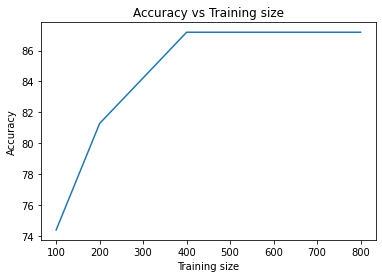

In [35]:
x_test = [100, 200, 300, 400, 500, 600, 700, 800]
y_test = [74.38, 81.28, 84.23, 87.19, 87.19, 87.19, 87.19, 87.19]
plt.ylabel('Accuracy')
plt.xlabel('Training size')
plt.title('Accuracy vs Training size')
plt.plot(x_test, y_test)
plt.show()